In [61]:
import pandas as pd
import numpy as np

In [145]:
def clean_date(x):
    try:
        divided = x.split(" ")
        return int(divided[0])
    except:
        return x

In [133]:
data = pd.read_csv('Data/train.csv')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14752\487555319.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Data/train.csv')


In [152]:
data_clean = data.copy()
data_clean = data_clean.drop(['Name','Month','Num_Bank_Accounts','Occupation','SSN','Interest_Rate',"Payment_of_Min_Amount"], axis=1)
mis_clean = data_clean.groupby(['Customer_ID'])[['ID','Monthly_Inhand_Salary']].ffill().set_index('ID')
data_clean = data_clean.set_index('ID')
data_clean['Monthly_Inhand_Salary'] = mis_clean
data_clean['Annual_Income'].apply(lambda x: float(x.split("_")[0]))
data_clean['Age'] = data_clean['Age'].apply(lambda x: int(x.split("_")[0])).apply(lambda x: np.nan if x < 18 else x)
data_clean['Age'] = data_clean.reset_index().groupby('Customer_ID')[['ID','Age']].ffill().set_index('ID')
data_clean['Num_Credit_Card'] = data_clean['Num_Credit_Card'].apply(lambda x: 11 if x >= 11 else x)
data_clean['Num_of_Loan'] = data_clean['Num_of_Loan'].apply(lambda x: int(x.split("_")[0])).apply(lambda x: 0 if x < 0 else x)
data_clean['Credit_History_Age'] = data_clean['Credit_History_Age'].apply(clean_date)
data_clean['Credit_History_Age'] = data_clean.reset_index().groupby(['Customer_ID'])[['ID','Credit_History_Age']].ffill().set_index('ID')


,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Credit_Card,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,23.0,19114.12,1824.843333,4,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22.0,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,23.0,19114.12,1824.843333,4,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,22.0,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
0x1604,CUS_0xd40,23.0,19114.12,1824.843333,4,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22.0,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
0x1605,CUS_0xd40,23.0,19114.12,1824.843333,4,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22.0,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
0x1606,CUS_0xd40,23.0,19114.12,1824.843333,4,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22.0,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x25fe9,CUS_0x942c,25.0,39628.99,3359.415833,6,2,"Auto Loan, and Student Loan",23,7,11.5,3.0,_,502.38,34.663572,31.0,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
0x25fea,CUS_0x942c,25.0,39628.99,3359.415833,6,2,"Auto Loan, and Student Loan",18,7,11.5,3.0,_,502.38,40.565631,31.0,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
0x25feb,CUS_0x942c,25.0,39628.99,3359.415833,6,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38,41.255522,31.0,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor


,Credit_History_Age
ID,
0x1602,22.0
0x1603,22.0
0x1604,22.0
0x1605,22.0
0x1606,22.0
...,...
0x25fe9,31.0
0x25fea,31.0
0x25feb,31.0


ID
0x1602     22.083333
0x1603           NaN
0x1604     22.250000
0x1605     22.333333
0x1606     22.416667
             ...    
0x25fe9    31.500000
0x25fea    31.583333
0x25feb    31.666667
0x25fec    31.750000
0x25fed    31.833333
Name: Credit_History_Age, Length: 100000, dtype: float64

<Axes: >

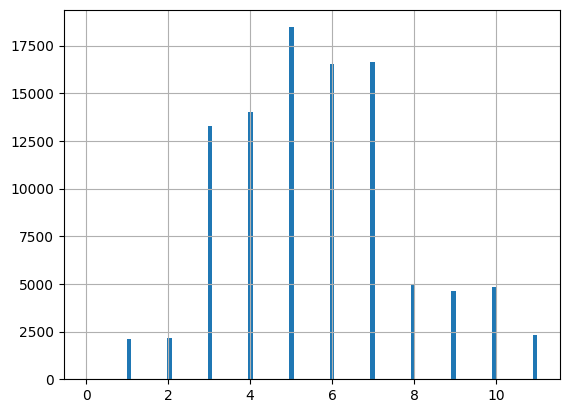

In [102]:
data_clean['Num_Credit_Card'].apply(lambda x: 11 if x >= 11 else x)